In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('Crime_Data_from_2010_to_2019.csv')
data2 = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
crime_data = data1.append(data2)

In [4]:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

In [5]:
def format_mil_string(x):
    """ format_mil_string - format military time integer to a 'HH:MM'
                            string.
    @param x: integer between 0-2359.
    @return string of format 'HH:MM'
    """
    x = str(x).zfill(4) # left pad if less than 4 digits
    minutes = x[-2:]
    if len(x) == 3:
        hour = x[:1]
    else:
        hour = x[:2]
    return hour + ':' + minutes

crime_data['TIME OCC'] = pd.to_datetime(crime_data['TIME OCC'].apply(format_mil_string), format='%H:%M').dt.time

In [6]:
display(crime_data)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,2010-02-20,2010-02-20,13:50:00,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,2010-09-13,2010-09-12,00:45:00,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,2010-08-09,2010-08-09,15:15:00,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,2010-01-05,2010-01-05,01:50:00,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,2010-01-03,2010-01-02,21:00:00,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253786,210105139,2021-01-28,2021-01-24,15:40:00,NaN,Central,161,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Invest Cont,343.0,NaN,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631,1.0
253787,210404776,2021-01-21,2021-01-19,16:00:00,NaN,Hollenbeck,497,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,1400 S DE LA TORRE WY,NaN,34.0166,-118.2058,4.0
253788,211208872,2021-03-19,2021-03-19,11:05:00,NaN,77th Street,1218,1,510,VEHICLE - STOLEN,...,Invest Cont,510.0,NaN,NaN,NaN,58TH ST,FIGUEROA ST,33.9897,-118.2827,12.0
253789,210506531,2021-03-04,2021-03-04,22:10:00,NaN,Harbor,564,2,434,FALSE IMPRISONMENT,...,Adult Arrest,434.0,NaN,NaN,NaN,200 W 2ND ST,NaN,33.7424,-118.2814,5.0


In [7]:
# violent crime
homicide = ['110', '113']
rape = ['121', '122', '815', '820', '821']
robbery = ['210', '220']
agg_assault = ['230', '231', '235', '236', '250', '251', '761', '926']
simple_assault = ['435', '436', '437', '622', '623', '624', 
                  '625', '626', '627', '647', '763', '928', '930']
violent_crime = homicide + rape + robbery + agg_assault + simple_assault


# propery crime
burglary = ['310', '320']
grand_theft_auto = ['510', '520', '433']
btfv = ['330', '331', '410', '420', '421']
personal_theft = ['350', '351', '352', '353', '450', '451', '452', '453']
other_theft = ['341', '343', '345', '440', '441', '442', '443', '444', 
               '445', '470', '471', '472', '473', '474', '475', '480', 
               '485', '487', '491']
property_crime = burglary + grand_theft_auto + btfv + personal_theft + other_theft

# What is the trend of overall crime in Los Angeles?

In [12]:
clean_data = crime_data[~crime_data['AREA'].isnull()]
weekly_count_by_area = clean_data.groupby(['AREA', pd.Grouper(key='DATE OCC', freq='1M')]).size()

print(weekly_count_by_area)

AREA  DATE OCC  
1.0   2020-01-31    1194
      2020-02-29    1118
      2020-03-31     957
      2020-04-30     801
      2020-05-31    1065
                    ... 
21.0  2020-12-31     632
      2021-01-31     627
      2021-02-28     525
      2021-03-31     622
      2021-04-30     453
Length: 336, dtype: int64


In [69]:
def plot_area_range(start, end, area_df):
    fig, ax=plt.subplots()
    for i in range(start, end):
        ax.plot(area_df[i])
    plt.legend(labels=range(start, end))
    plt.xticks(rotation=70)
    plt.figure(figsize=(25, 18), dpi=100)
    plt.show()

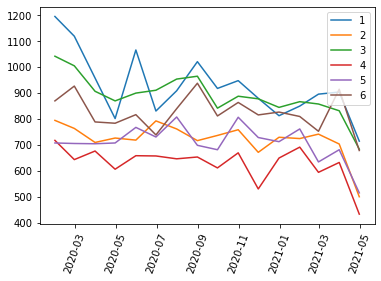

<Figure size 2500x1800 with 0 Axes>

In [70]:
plot_area_range(1, 7, weekly_count_by_area)

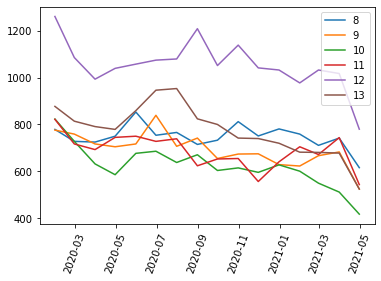

<Figure size 2500x1800 with 0 Axes>

In [71]:
plot_area_range(8, 14, weekly_count_by_area)

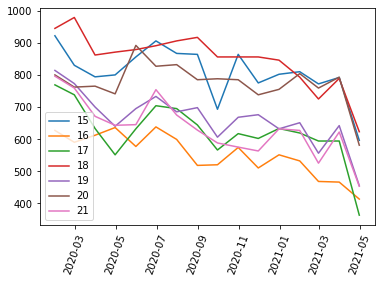

<Figure size 2500x1800 with 0 Axes>

In [72]:
plot_area_range(15, 22, weekly_count_by_area)